In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, cross_validation, svm

In [3]:
# 使用糖尿病数据
def load_data():
    diabetes = datasets.load_diabetes()
    x_train = diabetes.data
    y_train = diabetes.target
    return cross_validation.train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

In [5]:
# SVR-线性核
def test_SVR_linear(*data):
    x_train, x_test, y_train, y_test = data
    svr = svm.SVR(kernel='linear')
    svr.fit(x_train,y_train)
    print('Coefficients:{0}, intercept {1}'.format(svr.coef_, svr.intercept_))
    print('Score: {0}'.format(svr.score(x_test, y_test)))

x_train, x_test, y_train, y_test = load_data()
test_SVR_linear(x_train, x_test, y_train, y_test )

Coefficients:[[ 2.24127622 -0.38128702  7.87018376  5.21135861  2.26619436  1.70869458
  -5.7746489   5.51487251  7.94860817  4.59359657]], intercept [137.11012796]
Score: -0.02883699774812798


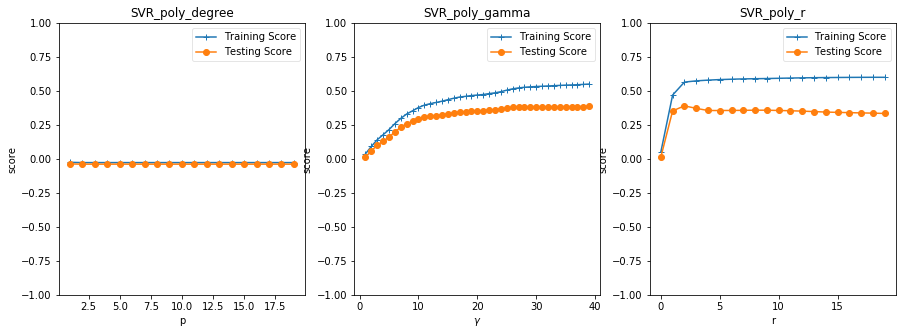

In [8]:
# SVR-多项式核
def test_SVR_poly(*data):
    train_x, test_x, train_y, test_y = data
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    # 测试degree
    degrees = range(1,20)
    train_score = []
    test_score = []
    for degree in degrees:
        svr = svm.SVR(kernel='poly',degree=degree,coef0=1)
        svr.fit(train_x,train_y)
        train_score.append(svr.score(train_x,train_y))
        test_score.append(svr.score(test_x,test_y))
            
    # 绘图：

    ax = fig.add_subplot(131)
    ax.plot(degrees,train_score,label='Training Score',marker='+')
    ax.plot(degrees,test_score, label='Testing Score',marker='o')
    ax.set_xlabel(r'p')
    ax.set_ylabel('score')
    ax.set_title('SVR_poly_degree')
    ax.set_ylim(-1,1)
    ax.legend(loc='best',framealpha=0.5)
    
    # 测试gamma
    gammas = range(1,40)
    train_score = []
    test_score = []
    for gamma in gammas:
        svr = svm.SVR(kernel='poly',gamma=gamma,degree=3,coef0=1)
        svr.fit(train_x,train_y)
        train_score.append(svr.score(train_x,train_y))
        test_score.append(svr.score(test_x,test_y))
            
    # 绘图：

    ax = fig.add_subplot(132)
    ax.plot(gammas,train_score,label='Training Score',marker='+')
    ax.plot(gammas,test_score, label='Testing Score',marker='o')
    ax.set_xlabel(r'$\gamma$')
    ax.set_ylabel('score')
    ax.set_title('SVR_poly_gamma')
    ax.set_ylim(-1,1)
    ax.legend(loc='best',framealpha=0.5)
    
    # 测试r
    rs = range(0,20)
    train_score = []
    test_score = []
    for r in rs:
        svr = svm.SVR(kernel='poly',gamma=20,degree=3, coef0=r)
        svr.fit(train_x,train_y)
        train_score.append(svr.score(train_x,train_y))
        test_score.append(svr.score(test_x,test_y))
            
    # 绘图：

    ax = fig.add_subplot(133)
    ax.plot(rs,train_score,label='Training Score',marker='+')
    ax.plot(rs,test_score, label='Testing Score',marker='o')
    ax.set_xlabel(r'r')
    ax.set_ylabel('score')
    ax.set_title('SVR_poly_r')
    ax.set_ylim(-1,1)
    ax.legend(loc='best',framealpha=0.5)
    
    plt.show()

x_train, x_test, y_train, y_test = load_data()
test_SVR_poly(x_train, x_test, y_train, y_test )

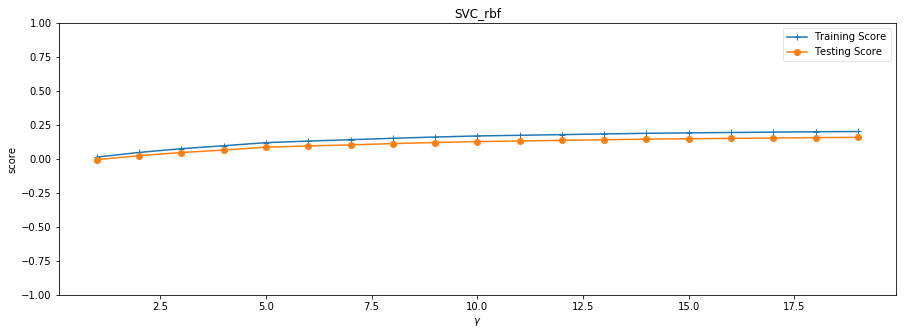

In [9]:
# SVR-高斯核
def test_SVR_rbf(*data):
    train_x, test_x, train_y, test_y = data
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    # 测试gamma
    gammas = range(1,20)
    train_score = []
    test_score = []
    for gamma in gammas:
        svr = svm.SVR(kernel='rbf',gamma=gamma)
        svr.fit(train_x,train_y)
        train_score.append(svr.score(train_x,train_y))
        test_score.append(svr.score(test_x,test_y))
            
    # 绘图：

    ax = fig.add_subplot(111)
    ax.plot(gammas,train_score,label='Training Score',marker='+')
    ax.plot(gammas,test_score, label='Testing Score',marker='o')
    ax.set_xlabel(r'$\gamma$')
    ax.set_ylabel('score')
    ax.set_title('SVC_rbf')
    ax.set_ylim(-1,1)
    ax.legend(loc='best',framealpha=0.5)
    
    
    plt.show()

x_train, x_test, y_train, y_test = load_data()
test_SVR_rbf(x_train, x_test, y_train, y_test )

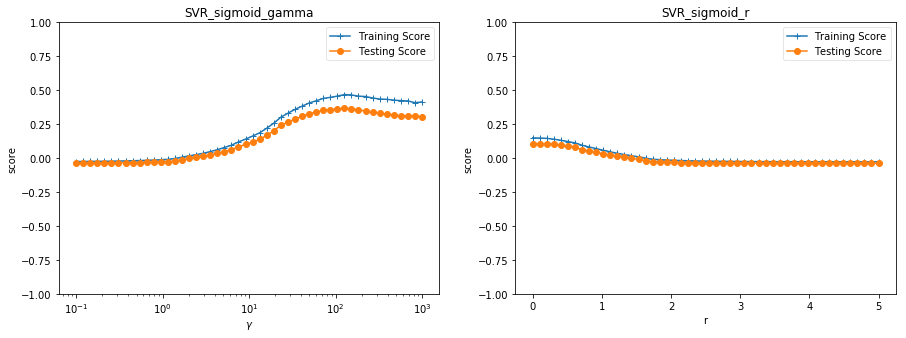

In [10]:
# SVR-sigmoid核
def test_SVR_sigmoid(*data):
    train_x, test_x, train_y, test_y = data
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    
    # 测试gamma
    gammas = np.logspace(-1, 3)
    train_score = []
    test_score = []
    for gamma in gammas:
        svr = svm.SVR(kernel='sigmoid',gamma=gamma,coef0=0.01)
        svr.fit(train_x,train_y)
        train_score.append(svr.score(train_x,train_y))
        test_score.append(svr.score(test_x,test_y))
            
    # 绘图：

    ax = fig.add_subplot(121)
    ax.plot(gammas,train_score,label='Training Score',marker='+')
    ax.plot(gammas,test_score, label='Testing Score',marker='o')
    ax.set_xlabel(r'$\gamma$')
    ax.set_ylabel('score')
    ax.set_title('SVR_sigmoid_gamma')
    ax.set_xscale('log')
    ax.set_ylim(-1,1)
    ax.legend(loc='best',framealpha=0.5)
    
    # 测试r
    rs = np.linspace(0,5)
    train_score = []
    test_score = []
    for r in rs:
        svr = svm.SVR(kernel='sigmoid',gamma=10,coef0=r)
        svr.fit(train_x,train_y)
        train_score.append(svr.score(train_x,train_y))
        test_score.append(svr.score(test_x,test_y))
            
    # 绘图：

    ax = fig.add_subplot(122)
    ax.plot(rs,train_score,label='Training Score',marker='+')
    ax.plot(rs,test_score, label='Testing Score',marker='o')
    ax.set_xlabel(r'r')
    ax.set_ylabel('score')
    ax.set_title('SVR_sigmoid_r')
    ax.set_ylim(-1,1)
    ax.legend(loc='best',framealpha=0.5)
    
    plt.show()

x_train, x_test, y_train, y_test = load_data()
test_SVR_sigmoid(x_train, x_test, y_train, y_test )